<a href="https://colab.research.google.com/github/mercy-ndungu/House-value-predictor/blob/main/House_prediction_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [501]:
#import drive
from google.colab import drive

In [502]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


from scipy import stats

In [503]:
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [504]:
#Mounted drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [505]:
#change my dataset into a csv file
df = pd.read_csv('/content/drive/MyDrive/dataset/data.csv')

In [506]:
# get an overview of my data
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [507]:
columns_to_drop = ['date','statezip', 'country']

# Create a new DataFrame without the specified columns
data = df.drop(columns_to_drop, axis=1)
data.shape

(4600, 15)

In [508]:
# Check size and shape of dataset
data.shape

(4600, 15)

In [509]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city'],
      dtype='object')

In [510]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 539.2+ KB


In [511]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
dtype: int64


In [512]:
print(data.dtypes)

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
dtype: object


In [513]:
#Change the float type of prices into integers
data['floors'] = data['floors'].astype(int)
data['price'] = data['price'].astype(int)
data['bedrooms'] = data['bedrooms'].astype(int)
data['bathrooms'] = data['bathrooms'].astype(int)
data['yr_built'] = data['yr_built'].astype(int)
data['yr_renovated'] = data['yr_renovated'].astype(int)



# Remove rows with "0" in the 'year_lenovated' column
data = data[data['yr_renovated'] != 0]


In [514]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 4596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1865 non-null   int64 
 1   bedrooms       1865 non-null   int64 
 2   bathrooms      1865 non-null   int64 
 3   sqft_living    1865 non-null   int64 
 4   sqft_lot       1865 non-null   int64 
 5   floors         1865 non-null   int64 
 6   waterfront     1865 non-null   int64 
 7   view           1865 non-null   int64 
 8   condition      1865 non-null   int64 
 9   sqft_above     1865 non-null   int64 
 10  sqft_basement  1865 non-null   int64 
 11  yr_built       1865 non-null   int64 
 12  yr_renovated   1865 non-null   int64 
 13  street         1865 non-null   object
 14  city           1865 non-null   object
dtypes: int64(13), object(2)
memory usage: 233.1+ KB


In [515]:
print(data.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city'],
      dtype='object')


In [516]:
print(data.dtypes)

price             int64
bedrooms          int64
bathrooms         int64
sqft_living       int64
sqft_lot          int64
floors            int64
waterfront        int64
view              int64
condition         int64
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
street           object
city             object
dtype: object


In [517]:
#Do summary statistics and flag the date time data to numeric to allow statistical computation
data.describe(include='all', datetime_is_numeric=True)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
count,1.865000e+03,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865,1865
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1853,42
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5968 44th Ave S,Seattle
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,783
mean,5.324407e+05,3.334048,1.620375,1996.748525,13845.016086,1.294906,0.008043,0.262198,3.299732,1660.735121,336.013405,1959.259517,1994.422520,NaN,NaN
std,4.804366e+05,0.954121,0.752402,928.049814,30571.562868,0.480188,0.089345,0.795907,0.529925,793.468766,469.183089,27.959221,21.372401,NaN,NaN
min,0.000000e+00,0.000000,0.000000,380.000000,833.000000,1.000000,0.000000,0.000000,2.000000,380.000000,0.000000,1900.000000,1912.000000,NaN,NaN
25%,3.080000e+05,3.000000,1.000000,1320.000000,5360.000000,1.000000,0.000000,0.000000,3.000000,1100.000000,0.000000,1942.000000,1990.000000,NaN,NaN
50%,4.450000e+05,3.000000,1.000000,1840.000000,7706.000000,1.000000,0.000000,0.000000,3.000000,1420.000000,0.000000,1958.000000,2001.000000,NaN,NaN
75%,6.250000e+05,4.000000,2.000000,2480.000000,10890.000000,2.000000,0.000000,0.000000,4.000000,2020.000000,640.000000,1979.000000,2006.000000,NaN,NaN


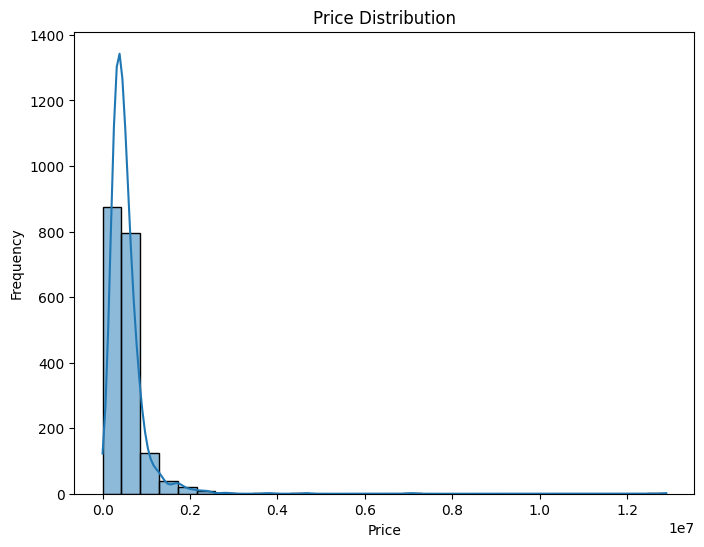

In [518]:
#See the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
import seaborn as sns
plt.ylabel('Frequency')
plt.show()


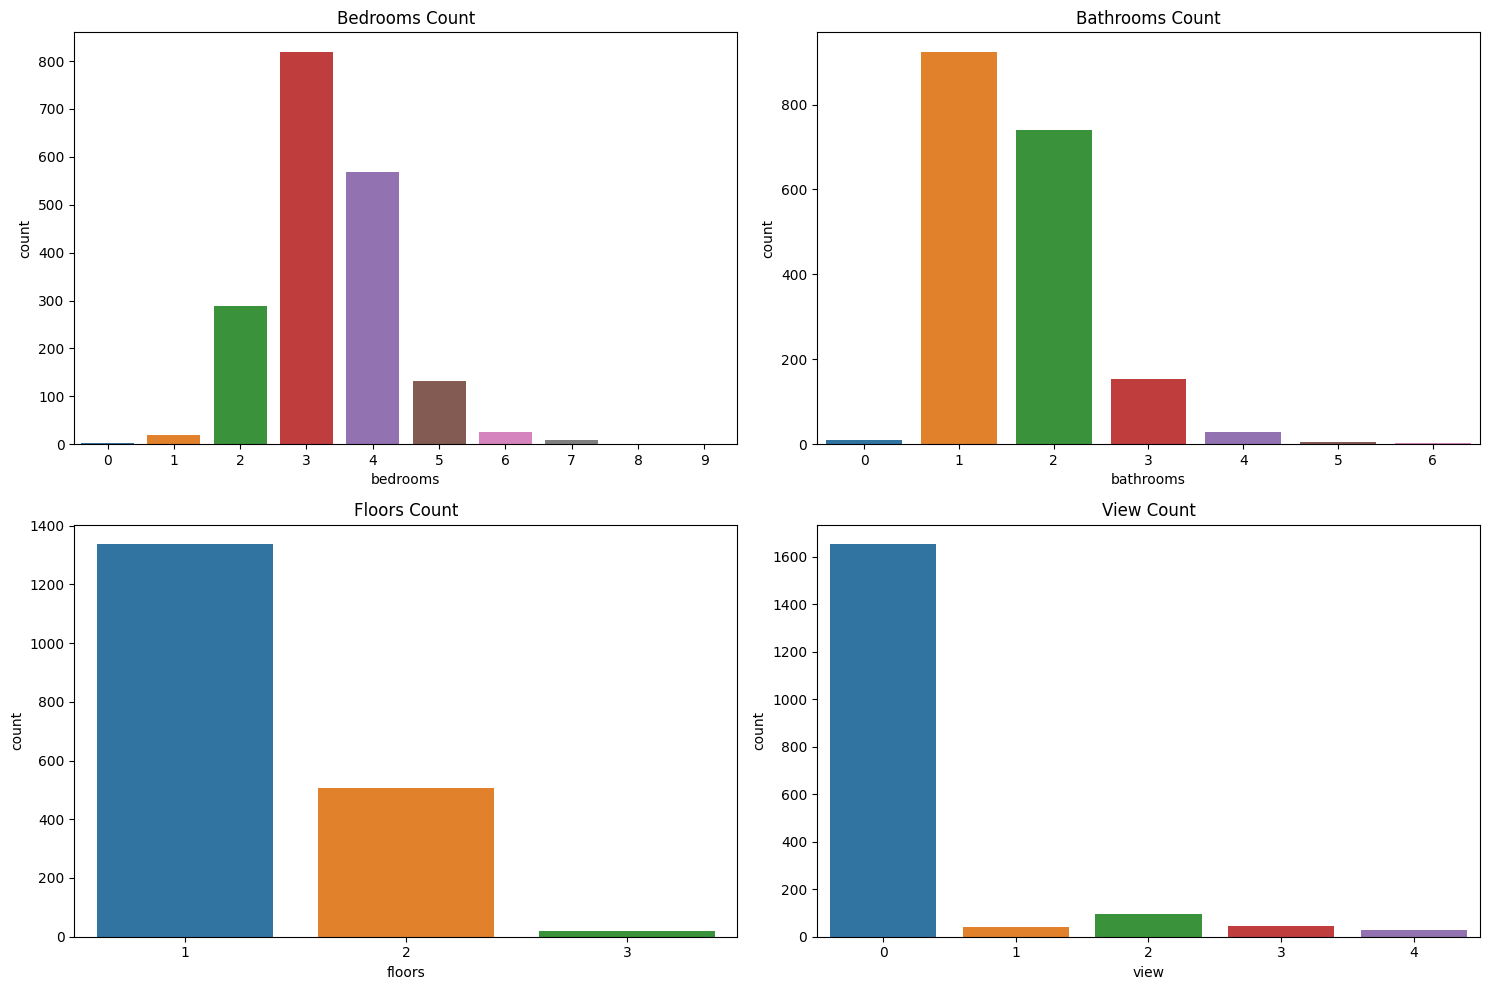

In [519]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot countplots for each categorical variable
sns.countplot(x="bedrooms", data=data, ax=axes[0, 0])
sns.countplot(x="bathrooms", data=data, ax=axes[0, 1])
sns.countplot(x="floors", data=data, ax=axes[1, 0])
sns.countplot(x="view", data=data, ax=axes[1, 1])

# Set titles for each subplot
axes[0, 0].set_title("Bedrooms Count")
axes[0, 1].set_title("Bathrooms Count")
axes[1, 0].set_title("Floors Count")
axes[1, 1].set_title("View Count")

plt.tight_layout()
plt.show()


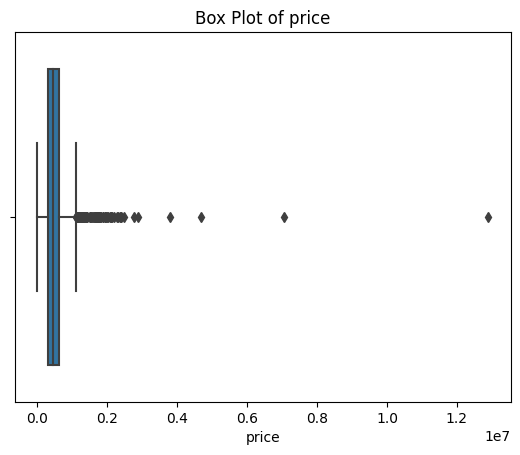

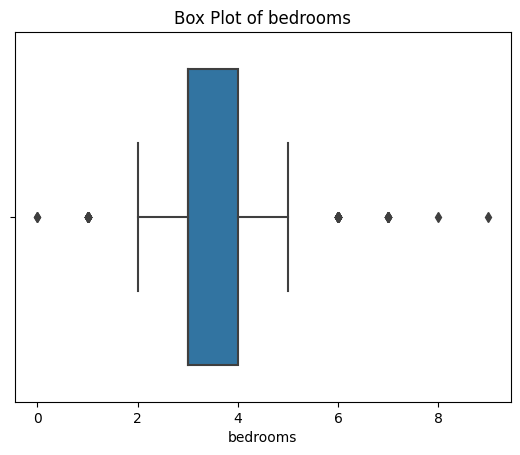

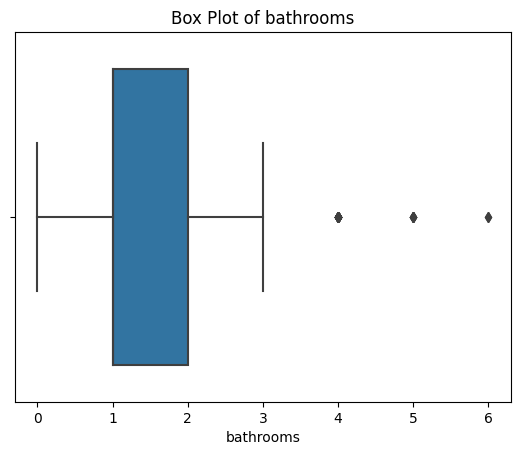

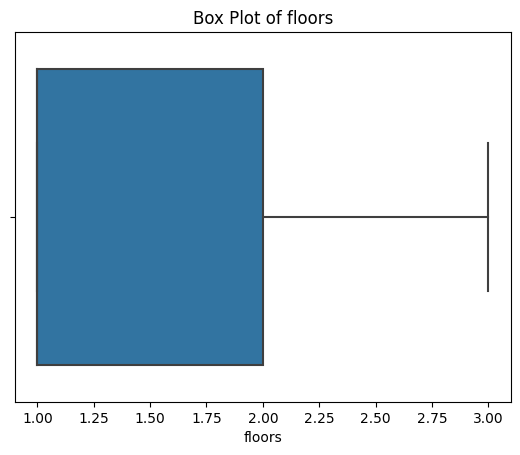

In [520]:
# Create box plots for numeric features
numeric_features = ["price", "bedrooms", "bathrooms","floors"]
for feature in numeric_features:
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [521]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 4596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1865 non-null   int64 
 1   bedrooms       1865 non-null   int64 
 2   bathrooms      1865 non-null   int64 
 3   sqft_living    1865 non-null   int64 
 4   sqft_lot       1865 non-null   int64 
 5   floors         1865 non-null   int64 
 6   waterfront     1865 non-null   int64 
 7   view           1865 non-null   int64 
 8   condition      1865 non-null   int64 
 9   sqft_above     1865 non-null   int64 
 10  sqft_basement  1865 non-null   int64 
 11  yr_built       1865 non-null   int64 
 12  yr_renovated   1865 non-null   int64 
 13  street         1865 non-null   object
 14  city           1865 non-null   object
dtypes: int64(13), object(2)
memory usage: 233.1+ KB


In [529]:
# Assign the data that you want to drop outliers to a variable
numeric_columns = ["price", "bedrooms", "bathrooms", "floors"]

# Calculate Z-scores for the variable containing the columns with outliers
z_scores = np.abs(stats.zscore(data[numeric_columns]))

# Define a threshold for outliers
threshold = 3

# Create a boolean mask for rows containing outliers in any of the specified columns
outlier_mask = (z_scores > threshold).any(axis=1)

# Create a new DataFrame without outliers
new_data = data[~outlier_mask]


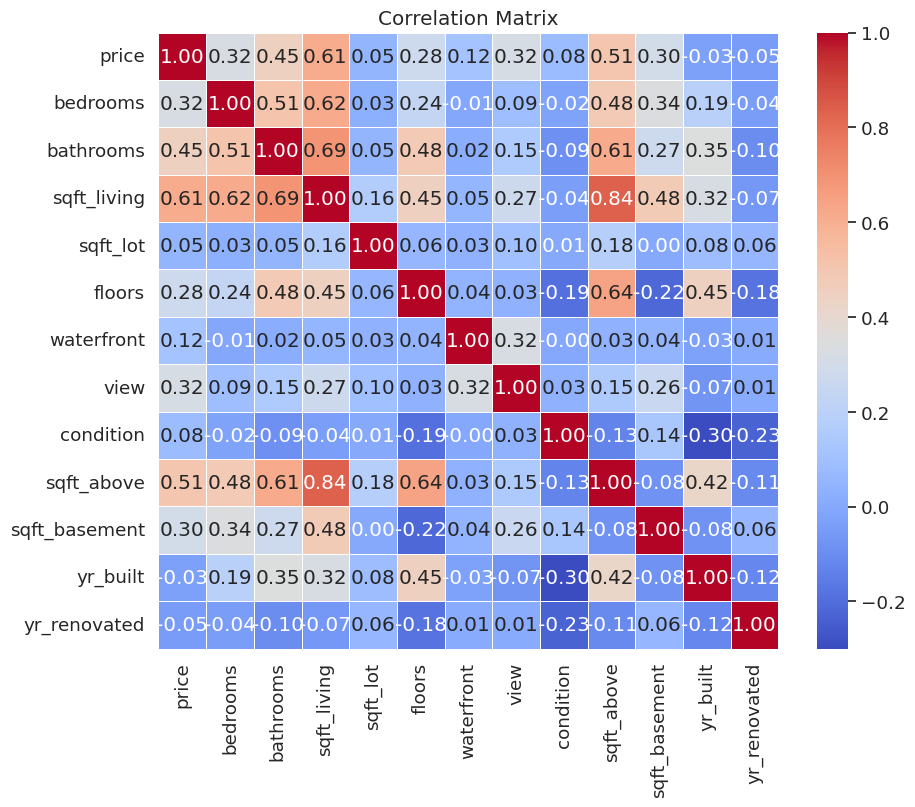

In [530]:
# Increase the size of the figure
plt.figure(figsize=(10, 8))

# Calculate and visualize the correlations between numeric variables.
correlation_matrix = new_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the fontsize of the annotations
sns.set(font_scale=1.2)

plt.title('Correlation Matrix')
plt.show()



Unique Cities:
['Shoreline' 'Redmond' 'Seattle' 'Lake Forest Park' 'Des Moines'
 'North Bend' 'Bellevue' 'Issaquah' 'Woodinville' 'Auburn' 'Fall City'
 'Sammamish' 'Carnation' 'Snoqualmie' 'Renton' 'Kirkland' 'Federal Way'
 'Kenmore' 'Newcastle' 'Burien' 'Clyde Hill' 'Algona' 'Covington'
 'Maple Valley' 'Duvall' 'Skykomish' 'Kent' 'Normandy Park'
 'Black Diamond' 'Mercer Island' 'Vashon' 'SeaTac' 'Ravensdale' 'Tukwila'
 'Bothell' 'Medina' 'Snoqualmie Pass' 'Beaux Arts Village' 'Preston'
 'Enumclaw' 'Yarrow Point' 'Pacific']
Distinct City Count: 42
Distinct Cities and Their Counts:
Seattle               751
Bellevue              107
Renton                106
Shoreline              74
Auburn                 64
Kirkland               61
Redmond                60
Sammamish              56
Federal Way            50
Kent                   46
Woodinville            45
Burien                 43
Issaquah               37
Des Moines             33
Kenmore                23
North Bend           

In [525]:
scaler = StandardScaler()
data[['bedrooms', 'bathrooms']] = scaler.fit_transform(data[['bedrooms', 'bathrooms']])

We separate the features (X) from the target variable (y) by dropping the "price" column from the new_data DataFrame and assigning it to X, and assigning the "price" column to y.

We use the train_test_split function to split the data into training and testing sets. You can specify the test_size parameter to control the size of the test set. In this example, it's set to 20%, meaning 80% of the data will be used for training, and 20% for testing.

The random_state parameter is set to a fixed value (42 in this case) to ensure reproducibility. You can change it to another value or leave it blank if you don't require a fixed seed for random splitting.

After running this code, you'll have X_train, X_test, y_train, and y_test to use for training and evaluating your house price prediction model.

In [526]:
# Define your features (X) and the target variable (y)
X = new_data.drop("price", axis=1)  # Features (all columns except "price")
y = new_data["price"]  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 'X_train' and 'y_train' are your training data and labels
# 'X_test' and 'y_test' are your testing data and labels

In [527]:
# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_reg_model.predict(X_test)

# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R-squared (R2): {r2_linear:.2f}")

ValueError: ignored

In [ ]:
# Initialize the Random Forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")
